# Analisis de algoritmos de clasificación aplicados a Dataset

## Importamos librerias

In [337]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler
#Bibliotecas para generar gráficos
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb

## Importamos el dataset

In [338]:
bipolar_interviews=pd.read_csv('./diario.csv', sep=';')

## Limpieza de datos

In [339]:
bipolar_interviews=bipolar_interviews.replace(to_replace="No", value=0)
bipolar_interviews=bipolar_interviews.replace(to_replace="Si", value=1)
bipolar_interviews=bipolar_interviews.replace(to_replace="NO", value=0)
bipolar_interviews=bipolar_interviews.replace(to_replace="no", value=0)
bipolar_interviews=bipolar_interviews.replace(to_replace="SI", value=1)

In [340]:
bipolar_interviews=bipolar_interviews.drop(columns=["Fecha","Hora de despertar","Hora a la que te dormiste","Ciclo menstrual"])

## Eliminamos valores de offset

In [341]:
#Calculamos limites de la distribucion de cafeina hasta 3 desviaciones estandar
mean_cafeina = bipolar_interviews.mean()[7]
std_cafeina = bipolar_interviews.std()[7]
lim_inf_caf = mean_cafeina - 3*std_cafeina
lim_sup_caf = mean_cafeina + 3*std_cafeina

#Calculamos limites de la distribución de cigarrillos hasta 3 desviaciones estandar
mean_cigarrillo=bipolar_interviews.mean()[6]
std_cigarrillo=bipolar_interviews.std()[6]
lim_inf_cig=mean_cigarrillo-3*std_cigarrillo
lim_sup_cig=mean_cigarrillo+3*std_cigarrillo

C:\Users\cris_\AppData\Local\Temp/ipykernel_11192/1727321591.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_cafeina = bipolar_interviews.mean()[7]
C:\Users\cris_\AppData\Local\Temp/ipykernel_11192/1727321591.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_cafeina = bipolar_interviews.std()[7]
C:\Users\cris_\AppData\Local\Temp/ipykernel_11192/1727321591.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_cigarrillo=bipolar_interviews.mean()[6]
C:\Users\cris_\AppDa

In [342]:
bipolar_trimmed=bipolar_interviews[(bipolar_interviews["Cafeína"]>=lim_inf_caf)&(bipolar_interviews["Cafeína"]<=lim_sup_caf)&(bipolar_interviews["Número de cigarrillos"]>=lim_inf_cig)&(bipolar_interviews["Número de cigarrillos"]<=lim_sup_cig)]

In [343]:
bipolar_trimmed

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,Código
0,2,2,3,3,3,3,34,150,0.0,0.0,D
1,2,2,3,3,3,3,38,150,0.0,0.0,D
2,2,1,3,3,3,3,39,120,0.0,0.0,D
3,1,2,2,2,2,3,34,120,0.0,0.0,D
4,1,1,3,2,2,2,32,150,0.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...,...
652,3,2,3,2,0,1,2,200,1.0,1.0,G
653,2,3,0,0,0,0,0,60,0.0,0.0,G
655,-3,-3,1,2,2,1,0,60,0.0,0.0,G
656,-3,-3,4,4,4,2,0,21,0.0,0.0,G


In [344]:
feature_cols = ['Estado de ánimo','Motivación','Problemas de concentración y atención','Irritabilidad','Ansiedad','Calidad del sueño','Número de cigarrillos','Cafeína']
X=bipolar_trimmed[feature_cols]

In [345]:
y=bipolar_trimmed['Código']

In [393]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## a) SVM

In [394]:
modelo_svm = SVC(kernel='linear', C=1.0, random_state=42)

In [395]:
modelo_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [396]:
y_val_preda = modelo_svm.predict(X_val)
y_preda=modelo_svm.predict(X_test)

In [397]:
# Calcular la precisión en el conjunto de validación
precision_val = accuracy_score(y_val, y_val_preda)
print("Precisión en el conjunto de validación:", precision_val)

Precisión en el conjunto de validación: 0.9230769230769231


In [398]:
# Exactitud
accuracy = accuracy_score(y_test, y_preda)
print("Precisión:", accuracy)

# Precision
precision = precision_score(y_test, y_preda,average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_preda,average='macro')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_preda,average='macro')
print("F1-score:", f1)

Precisión: 0.9696969696969697
Precision: 0.9770114942528735
Recall: 0.9722222222222222
F1-score: 0.9736024844720497


In [399]:
c=confusion_matrix(y_test, y_pred, labels=['M', 'D', 'G'])
pd.DataFrame(c,index=['M', 'D', 'G'],columns=['M', 'D', 'G'])

,M,D,G
M,21,3,0
D,0,27,0
G,1,0,14


## b) Algoritmo de KNN

In [400]:
# Se hace un barrido para los distintos valores de K, evaluando la exactitud del algoritmo (o puntuación)
k_range = range(1,50)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_predb=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_predb)
        
        scores_list.append(metrics.accuracy_score(y_test,y_predb))

Text(0, 0.5, 'Testing Accuracy')

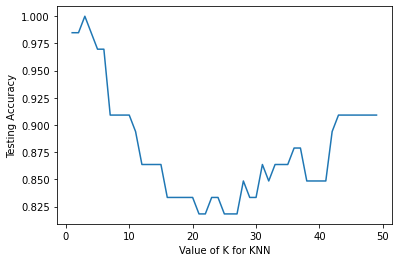

In [401]:
#Se grafica la relación entre K y su exactitud o puntuación
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## c) Algoritmo de Naive bayes

In [402]:
gnb = GaussianNB()
# Train classifier

gnb.fit(X_train,y_train)

GaussianNB()

In [403]:
y_val_pred = gnb.predict(X_val)
y_pred=gnb.predict(X_test)



In [404]:
# Calcular la precisión en el conjunto de validación
precision_val = accuracy_score(y_val, y_val_pred)
print("Precisión en el conjunto de validación:", precision_val)

Precisión en el conjunto de validación: 0.9384615384615385


In [405]:
# Excatitud
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Precision
precision = precision_score(y_test, y_pred,average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred,average='macro')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred,average='macro')
print("F1-score:", f1)

Precisión: 0.9393939393939394
Precision: 0.9515151515151515
Recall: 0.9361111111111112
F1-score: 0.9419763802309372


In [406]:
c=confusion_matrix(y_test, y_pred, labels=['M', 'D', 'G'])
pd.DataFrame(c,index=['M', 'D', 'G'],columns=['M', 'D', 'G'])

,M,D,G
M,21,3,0
D,0,27,0
G,1,0,14


## d) Random Forest

In [407]:
rf = RandomForestClassifier(n_jobs=-1)

rf.fit(X_train, y_train)

y_val_pred = rf.predict(X_val)
y_pred=rf.predict(X_test)

scores = cross_val_score(rf, X_test, y_pred, cv=2)

print("Precisión del modelo: ", scores.mean())

Precisión del modelo:  0.9090909090909091


In [408]:
precision_val = accuracy_score(y_val, y_val_pred)
print("Precisión en el conjunto de validación:", precision_val)

Precisión en el conjunto de validación: 0.9692307692307692


In [409]:
# Exactitud
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Precision
precision = precision_score(y_test, y_pred,average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred,average='macro')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred,average='macro')
print("F1-score:", f1)

Precisión: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [410]:
c=confusion_matrix(y_test, y_pred, labels=['M', 'D', 'G'])
pd.DataFrame(c,index=['M', 'D', 'G'],columns=['M', 'D', 'G'])

,M,D,G
M,24,0,0
D,0,27,0
G,0,0,15


## e) Arbol de decisión

In [411]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)


scores = cross_val_score(dt, X_test, y_test)
print("Exactitud del modelo:", scores.mean())

Exactitud del modelo: 0.9846153846153847


In [412]:
y_val_pred = dt.predict(X_val)
y_pred=dt.predict(X_test)

In [413]:
# Exactitud
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Precision
precision = precision_score(y_test, y_pred,average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred,average='macro')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred,average='macro')
print("F1-score:", f1)

Precisión: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [414]:
c=confusion_matrix(y_test, y_pred, labels=['M', 'D', 'G'])
pd.DataFrame(c,index=['M', 'D', 'G'],columns=['M', 'D', 'G'])

,M,D,G
M,24,0,0
D,0,27,0
G,0,0,15


## f) gradient Boosting

In [415]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [416]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [417]:
y_pred = gb_model.predict(X_test)
y_val_pred = gb_model.predict(X_val)


In [418]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 1.0


In [419]:
# Exactitud
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Precision
precision = precision_score(y_test, y_pred,average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred,average='macro')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred,average='macro')
print("F1-score:", f1)

Precisión: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [420]:
c=confusion_matrix(y_test, y_pred, labels=['M', 'D', 'G'])
pd.DataFrame(c,index=['M', 'D', 'G'],columns=['M', 'D', 'G'])

,M,D,G
M,24,0,0
D,0,27,0
G,0,0,15
